# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# importing NewsApiClient
from newsapi import NewsApiClient 

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jalhussain/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
load_dotenv()
news_api_key = os.getenv('NEWS_API_KEY')


In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_api_key)

In [5]:
# Fetch the Bitcoin news articles
btc_article = newsapi.get_everything(q='Bitcoin' , language='en' , page_size=100 )


In [6]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='Ethereum', language='en' , page_size=100 )


In [7]:
# Create a function to call the news api and make the scores DataFrame ( sourced from Assigment code examples)
def coin_score(coin_articles):
    coin_sentiments = []

    for article in coin_articles["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            coin_sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu

            })

        except AttributeError:
            pass
        
    # Create DataFrame
    coin_df = pd.DataFrame(coin_sentiments)

    # Reorder DataFrame columns
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    coin_df = coin_df[cols]

    return coin_df



In [8]:
'''
# function to store titles , description and content of newsapi results
def news_to_df_sperated(news, output):
    titles =[] 
    descriptions = [] 
    contents = []
  
    for i in range(len(news['articles'])):
        titles.append([news['articles'][i]['title']])
        descriptions.append([ news['articles'][i]['description']])
        contents.append([ news['articles'][i]['content']])
    
    if output == 'titles':
        return titles
    elif output == 'contents':
        return contents
    elif output == 'descriptions':
        return descriptions
    else: 
        return print('You must provide a an output')
    
    # Function to store results into a dataframe 
def news_to_df_full(news):
    articles_lst = [] 
    for i in range(len(news['articles'])):
        articles_lst.append(news['articles'][i])
    return articles_lst '''

"\n# function to store titles , description and content of newsapi results\ndef news_to_df_sperated(news, output):\n    titles =[] \n    descriptions = [] \n    contents = []\n  \n    for i in range(len(news['articles'])):\n        titles.append([news['articles'][i]['title']])\n        descriptions.append([ news['articles'][i]['description']])\n        contents.append([ news['articles'][i]['content']])\n    \n    if output == 'titles':\n        return titles\n    elif output == 'contents':\n        return contents\n    elif output == 'descriptions':\n        return descriptions\n    else: \n        return print('You must provide a an output')\n    \n    # Function to store results into a dataframe \ndef news_to_df_full(news):\n    articles_lst = [] \n    for i in range(len(news['articles'])):\n        articles_lst.append(news['articles'][i])\n    return articles_lst "

In [9]:
#storing the text data into a dataframe 
btc_df = coin_score(btc_article)
btc_df.head()


,date,text,compound,positive,negative,neutral
0,2022-02-17,"Even in cyberspace, the Department of Justice ...",0.7351,0.147,0.000,0.853
1,2022-03-17,"When Russia invaded Ukraine, Niki Proshin was ...",0.0000,0.000,0.000,1.000
2,2022-03-12,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831
3,2022-02-22,Feb 22 (Reuters) - Bitcoin miners are feeling ...,-0.1779,0.046,0.067,0.887
4,2022-03-01,March 1 (Reuters) - Bitcoin has leapt since Ru...,0.0000,0.000,0.000,1.000


In [10]:
# Create the Ethereum sentiment scores DataFrame
eth_df = coin_score(eth_articles)
eth_df.head()


,date,text,compound,positive,negative,neutral
0,2022-03-01,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848
1,2022-02-17,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941
2,2022-02-25,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812
3,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917
4,2022-03-13,"If it sounds too good to be true, youre not wr...",0.8340,0.236,0.050,0.713


In [11]:
# Saving the BTC and ETH df's to test and not call the news API multiple times ( this cell should be commented out for real use cases)
btc_df.to_csv('btc.csv' , index=False)
btc_df = pd.read_csv('btc.csv')

eth_df.to_csv('eth.csv' , index=False)
eth_df = pd.read_csv('eth.csv')


In [12]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.057926,0.069720,0.049930,0.880340
std,0.435918,0.069763,0.063435,0.087292
min,-0.895700,0.000000,0.000000,0.627000
25%,-0.273200,0.000000,0.000000,0.834750
50%,0.000000,0.062000,0.000000,0.891500
75%,0.401900,0.099000,0.083000,0.940750
max,0.910000,0.301000,0.265000,1.000000


In [13]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.145759,0.079060,0.042080,0.878830
std,0.442748,0.069754,0.064156,0.085209
min,-0.913600,0.000000,0.000000,0.627000
25%,-0.064375,0.000000,0.000000,0.835250
50%,0.177900,0.072000,0.000000,0.887000
75%,0.510600,0.125000,0.066250,0.935000
max,0.862500,0.290000,0.312000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has a higher positive mean of 0.08

Q: Which coin had the highest compound score?

A: Bitcoin with 0.91

Q. Which coin had the highest positive score?

A: Bitcoin with 0.30

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [15]:
# Instantiate the lemmatizer
lema = WordNetLemmatizer()
# Create a list of stopwords
stop_words = set(stopwords.words('english'))
# Expand the default stopwords list if necessary
sw_extras = {'char' , ' according' , 'said' , 'wa' , 'said' , 'country' , 'since' , 'way' , 'also'}
stop_words = stop_words.union(sw_extras)

In [16]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile('[^a-zA-Z]')
    for word in text :
        regex.sub('' , word)
        if word in punctuation:
            text = text.replace(word , '')
        
    # Create a tokenized list of the words
    words = word_tokenize(text)
        
    # Lemmatize words into root words
    lemitized_words = [lema.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    lower_case = [word.lower() for word in lemitized_words]
        
    # Remove the stop words
    tokens = [word for word in lower_case if word not in stop_words]
    
    return tokens

In [17]:
# Create a new tokens column for Bitcoin
btc_tokens = []

for i in range (len(btc_df)):
    btc_tokens.append(tokenizer(btc_df['text'][i]))
    
btc_df['tokens'] = btc_tokens
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-02-17,"Even in cyberspace, the Department of Justice ...",0.7351,0.147,0.000,0.853,"[even, cyberspace, department, justice, able, ..."
1,2022-03-17,"When Russia invaded Ukraine, Niki Proshin was ...",0.0000,0.000,0.000,1.000,"[russia, invaded, ukraine, niki, proshin, alre..."
2,2022-03-12,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831,"[bitcoin, seen, many, libertarianleaning, fan,..."
3,2022-02-22,Feb 22 (Reuters) - Bitcoin miners are feeling ...,-0.1779,0.046,0.067,0.887,"[feb, 22, reuters, bitcoin, miner, feeling, he..."
4,2022-03-01,March 1 (Reuters) - Bitcoin has leapt since Ru...,0.0000,0.000,0.000,1.000,"[march, 1, reuters, bitcoin, ha, leapt, russia..."


In [18]:
# Create a new tokens column for Ethereum
eth_tokens = []

for i in range (len(eth_df)):
    eth_tokens.append(tokenizer(eth_df['text'][i]))
    
eth_df['tokens'] = eth_tokens
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-03-01,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848,"[february, shit, hit, fan, usual, old, tweet, ..."
1,2022-02-17,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941,"[technical, analysis, isnt, perfect, tool, may..."
2,2022-02-25,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812,"[coinbase, reported, share, trading, volume, e..."
3,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917,"[illustration, james, bareham, verge, 15, mill..."
4,2022-03-13,"If it sounds too good to be true, youre not wr...",0.8340,0.236,0.050,0.713,"[sound, good, true, youre, wrong, yield, farmi..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
# create a function to flatten our tokens to one list 
def flatten(lst):
    return [item for sublist in lst for item in sublist]

# create a a single list for both btc and eth tokens 
preprocess_btc = flatten(btc_tokens)
preprocess_eth = flatten(eth_tokens)


In [21]:
# Generate the Bitcoin N-grams where N=2
btc_bigram = ngrams(preprocess_btc , n=2)


In [22]:
# Generate the Ethereum N-grams where N=2
eth_bigram = ngrams(preprocess_eth , n=2)

In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Use token_count to get the top 10 words for Bitcoin
btc_counts = token_count(btc_bigram)
btc_counts

[(('new', 'york'), 5),
 (('reuters', 'bitcoin'), 4),
 (('invasion', 'ukraine'), 4),
 (('london', 'feb'), 4),
 (('russia', 'invaded'), 3),
 (('invaded', 'ukraine'), 3),
 (('war', 'ukraine'), 3),
 (('march', '15'), 3),
 (('joe', 'biden'), 3),
 (('feb', '24'), 3)]

In [25]:
# Use token_count to get the top 10 words for Ethereum
eth_counts = token_count(eth_bigram)
eth_counts

[(('venture', 'capital'), 6),
 (('personal', 'finance'), 4),
 (('finance', 'insider'), 4),
 (('insider', 'writes'), 4),
 (('writes', 'product'), 4),
 (('product', 'strategy'), 4),
 (('strategy', 'tip'), 4),
 (('tip', 'help'), 4),
 (('help', 'make'), 4),
 (('make', 'smart'), 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

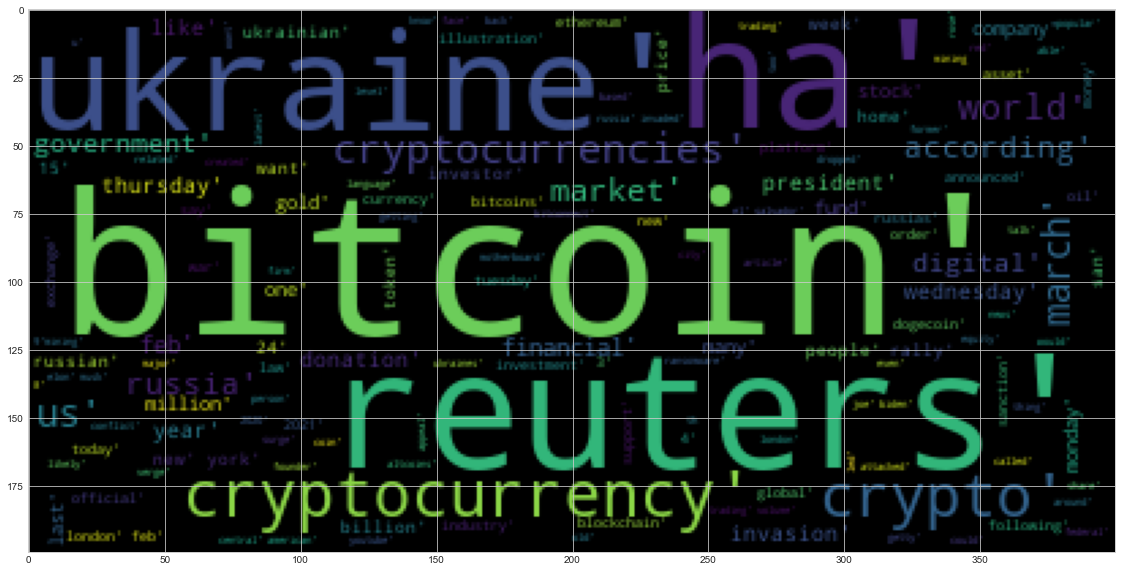

In [40]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(str(preprocess_btc))
plt.imshow(btc_wc)
plt.savefig('imgs/btc_wc.png' , format='png')

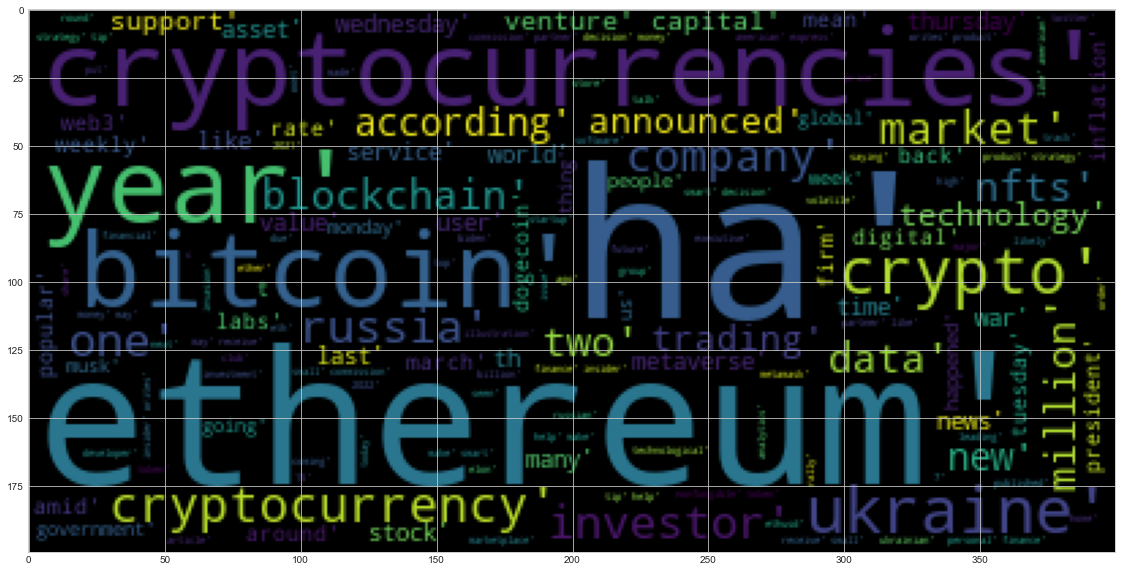

In [43]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(str(preprocess_eth))
plt.imshow(eth_wc)
plt.savefig('imgs/eth_wc.png' , format='png' , pad_inches=0.1 , dpi='figure')

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [29]:
import spacy
from spacy import displacy

In [30]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [31]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [32]:
# Concatenate all of the Bitcoin text together 'String to insert'.join([List of strings])
btc_text = "".join(btc_df['text'])

In [33]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_text)

# Add a title to the document doc.user_data["title"] = "This is a title"
btc_ner.user_data['title'] = 'Bitcoin NER (Name Entity Recognition)'

In [46]:
# Render the visualization
displacy.render(btc_ner , style='ent')


In [35]:
# List all Entities
btc_ner.ents

(the Department of Justice,
 Monaco,
 Al Capone,
 Russia,
 Ukraine,
 Niki Proshin,
 a year,
 YouTube,
 TikTok,
 Instagram,
 Russian,
 the New York Times,
 22,
 Reuters,
 2021,
 thousands,
 Reuters,
 Russia,
 Ukraine,
 Satoshi Nakamoto,
 2008,
 Nonfungible Tidbits,
 this week,
 Russia,
 Ukraine,
 Ukrainians,
 Russian,
 YouTube,
 Alex Castro,
 Verge,
 BitConnect,
 Getty,
 Russia,
 last Thursday,
 Ukranian,
 Mexico City,
 Telegr,
 March 4,
 Reuters,
 Russia,
 Ukraine,
 Russia,
 15,
 Reuters,
 U.S.,
 Joe Biden,
 Reuters,
 BITCOIN,
 +6882 chars]<ul><li>,
 Summary</li><li>,
 Law firms</li><li>,
 documents</li></ul,
 Ukrainian,
 Tom Lee,
 Ukraine,
 Shark Tank,
 Kevin O'Leary's,
 100,000,
 200,000,
 300,000,
 two-week,
 Tuesday,
 Russians,
 Ukrainians,
 March 11,
 Reuters,
 El Salvador,
 between March 15 and 20,
 Central American,
 Feb 20,
 Reuters,
 El Salvador,
 Nayib Bukele,
 Sunday,
 Congress,
 Central American,
 Satish Kumbhani,
 BitConnect,
 last week,
 $2.4 billion,
 Ponzi,
 James Bareh

---

### Ethereum NER

In [36]:
# Concatenate all of the Ethereum text together
eth_text = "".join(eth_df['text'])

In [37]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_text)

# Add a title to the document
eth_ner.user_data['title'] = 'Ethereum NER (Name Entity Recognition'

In [38]:
# Render the visualization
displacy.render(eth_ner , style='ent')

In [39]:
# List all Entities
eth_ner.ents

(February,
 Ethereum Name Service,
 ENS,
 May 201,
 Ethereum,
 ETH-USD,
 Crypto,
 last year,
 Between 2020 and 2021,
 James Bareham,
 More than $15 million,
 More than $15 million,
 Ukrainian,
 Russia,
 2022,
 Facebook,
 Microsoft,
 Twitter,
 Ethereum,
 second,
 two months,
 NFT,
 two hours,
 YouTube,
 Waka Flacka Fla,
 the past few years,
 NFT,
 $23 billion,
 TIME,
 weekly,
 TIME,
 weekly,
 Biden,
 Wednesday,
 first,
 the past few years,
 NFT,
 $23 billion,
 the past few years,
 NFT,
 $23 billion,
 Ethereum,
 American Express,
 $450 million,
 Series,
 US,
 over $7 billion,
 Russia,
 Ukraine,
 American Express,
 days,
 March 11,
 Yuga Labs,
 Meebits,
 Larva Labs,
 more than a dozen,
 Ethereum,
 more than $4 million,
 Russia,
 Elliptic,
 Tuesday,
 Ukraine,
 Russia,
 Elliptic,
 nearly $55 million,
 Russia,
 Ukraine,
 Bloomberg,
 Getty Images,
 Bitcoin, Ethereum,
 DogeCoin,
 Binance,
 June 28, 2021,
 REUTERS,
 Dado Ruvic/Illus,
 only one,
 NFT,
 Russia,
 Ukraine,
 Niki Proshin,
 a year,
 

---